## In this notebook we will explore the Facebook ads click dataset.
***
1. Explore the features
2. Impute missing values if any
3. Build some new features from the existing ones if needed
4. Split the train and test set

In [49]:
import pandas as pd
import csv  # for finding delimiter
import seaborn as sns
import pickle

In [12]:
ad_click_dataset = pd.read_csv('../input/Facebook_Ads_2.csv', 
                               delimiter=',', encoding='ISO-8859-1') # the encoding is new

In [20]:
ad_click_dataset.shape

(499, 6)

**Names and emails cannot be used in this case. We don't want the model to develop a bias towards these features.**
* Country: can be treated as a categorical (nominal) variable
* Time spent on site: apply minmax scaler
* Salary: Not sure what salary means in this case, might want to scale this too

In [15]:
clean_ad_click_dataset = ad_click_dataset.drop(['Names','emails'], axis=1,
                                              inplace=False)

In [18]:
clean_ad_click_dataset.head()

,Country,Time Spent on Site,Salary,Clicked
0,Bulgaria,25.649648,55330.06006,0
1,Belize,32.456107,79049.07674,1
2,Algeria,20.945978,41098.60826,0
3,Cook Islands,54.039325,37143.35536,1
4,Brazil,34.249729,37355.11276,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59b8e51710>,
      dtype=object)

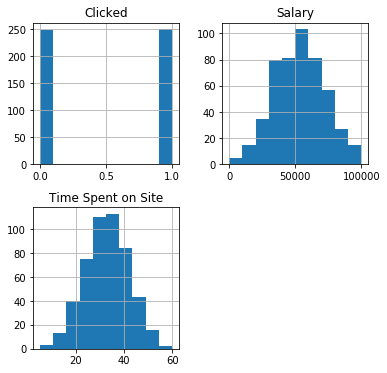

In [19]:
clean_ad_click_dataset.hist(figsize=(6,6))

**The target variable clicked looks evenly distributed(extremely rare!). Also the salary and time spent on site looks normally distributed.**

In [25]:
clean_ad_click_dataset.groupby(['Country'])['Country'].count().sort_values(ascending=False)

Country
Mauritania                                      6
Israel                                          6
Bolivia                                         6
Guinea                                          5
Laos                                            5
Iraq                                            5
Liechtenstein                                   5
Grenada                                         5
Greenland                                       5
Equatorial Guinea                               5
Samoa                                           5
Saint Barthélemy                                5
Kyrgyzstan                                      5
Algeria                                         5
Armenia                                         5
Bhutan                                          5
Sao Tome and Principe                           4
Venezuela                                       4
Andorra                                         4
Sierra Leone                              

In [27]:
len(clean_ad_click_dataset['Country'].unique())

210

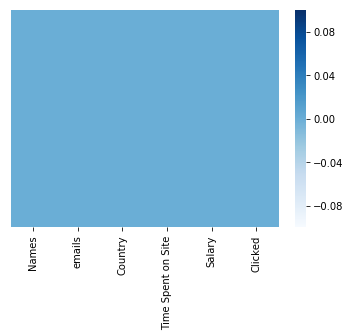

In [30]:
sns.heatmap(ad_click_dataset.isnull(), cmap="Blues", yticklabels=False)

**No missing values.**

**Split the dataset into train and test**

In [41]:
# shuffle the rows in the dataset
shuffled_dataset = ad_click_dataset.sample(frac=1, random_state=0).reset_index(drop=True)

In [43]:
train_set = shuffled_dataset[:400]

In [46]:
test_set = shuffled_dataset[400:]

In [48]:
test_set.shape

(99, 6)

In [51]:
with open('../input/train_set.pickle', 'wb') as pickle_handle:
    pickle.dump(train_set, pickle_handle)

In [52]:
with open('../input/test_set.pickle', 'wb') as pickle_handle:
    pickle.dump(test_set, pickle_handle)